In [4]:
import numpy as np
import xarray
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

C:\Users\Admin\anaconda3\envs\PythonProj\lib\site-packages\xarray\backends\cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


# # import GEV fit function from Chonghua's lib

In [2]:
my_lib = r'E:\Tuflow\Cal_rainfall_timeseries\myClimPy'
import sys
if my_lib not in sys.path:
    sys.path.append(my_lib)
from mycdat.extreme import extrp_gev_aris

# # example
# xaris = extrp_gev_aris(aris_old, gevs_old, aris_new)

In [3]:
# Read ARIs from a NetCDF file
filename = r'E:\NZ_ExtremePrep\NewZealand_Extreme_Precipitation_baseline_NIWA.nc4'
ds = xarray.open_dataset(filename)
variable_names = list(ds.variables.keys())
variable_names



['ari', 'hrs', 'lat', 'lon', 'Extreme_Precipitation']

In [4]:
ari_values = ds['ari'].values
hrs_values = ds['hrs'].values
latitude_values = ds['lat'].values
longitude_values = ds['lon'].values

data = ds['Extreme_Precipitation'].values


In [6]:
data.shape, ari_values, hrs_values

((12, 12, 700, 750),
 array([  1.58,   2.  ,   5.  ,  10.  ,  20.  ,  30.  ,  40.  ,  50.  ,
         60.  ,  80.  , 100.  , 250.  ]),
 array([  0.166667,   0.333333,   0.5     ,   1.      ,   2.      ,
          6.      ,  12.      ,  24.      ,  48.      ,  72.      ,
         96.      , 120.      ]))

# # Test the function by fake data

In [6]:
# Test the fit function
aris_old = np.asarray([1.58, 2., 5., 10., 20., 30., 40., 50., 60., 80., 100., 250.])
gevs_old = np.asarray([12.091699, 13.218555, 17.081163, 19.947504, 22.896297, 24.666334, 25.940613, 26.938097, 27.758078, 29.059067, 30.072397, 34.232296])
aris_new = np.asarray([1.58, 2., 5., 10., 20., 30., 40., 50., 60., 80., 100., 250., 500.])

In [7]:
result, cov_has_infinity = extrp_gev_aris(aris_old, gevs_old, aris_new)
result, cov_has_infinity

(array([12.20316653, 13.14915596, 16.95732786, 19.9217182 , 22.93350707,
        24.71279777, 25.98200834, 26.97005222, 27.77952567, 29.06056068,
        30.0572356 , 34.17504409, 37.31410614]),
 False)

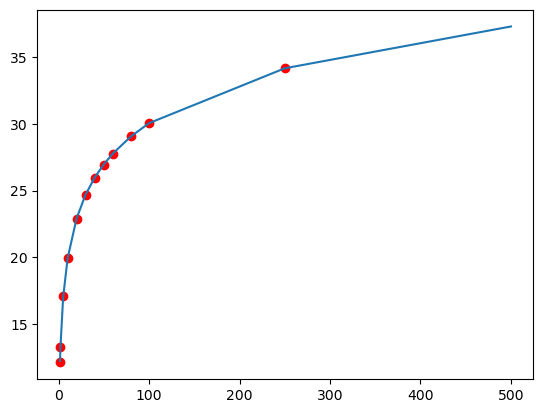

In [8]:
plt.scatter(aris_old, gevs_old, label='NIWA', color='red', marker='o')
plt.plot(aris_new, result, label='fitted')
plt.show()

# # Fit ARI500

In [5]:
data_combined = xarray.DataArray(np.zeros((1, len(hrs_values), len(latitude_values), len(longitude_values))), dims=('ari', 'hrs', 'lat', 'lon'))
data_combined.shape

(1, 12, 700, 750)

In [6]:
# extrapolate ARI500
for hr_index, hr_value in enumerate(hrs_values):
    for lat_index, lat_value in enumerate(latitude_values):
        for lon_index, lon_value in enumerate(longitude_values):
            aris_old = ari_values
            gevs_old = data[:, hr_index, lat_index, lon_index]
            aris_new = np.asarray([500.0])
            # # test if cov matrix is valid data
            # # to use the code, add 'cov' in the return list of the function 'extrp_gev_aris' in r'\myClimPy\mycdat\extreme_ariextension.py'
            # result, cov_has_infinity = extrp_gev_aris(aris_old, gevs_old, aris_new)
            # if cov_has_infinity == True:
            #     print(lat_index, lon_index)
            result = extrp_gev_aris(aris_old, gevs_old, aris_new)
            data_combined[:, hr_index, lat_index, lon_index] = result
        

In [7]:
data_combined

<xarray.DataArray (ari: 1, hrs: 12, lat: 700, lon: 750)>
array([[[[ 37.5230872 ,  37.5230872 ,  37.5230872 , ...,  29.46115865,
           29.46115865,  29.46115865],
         [ 37.5230872 ,  37.5230872 ,  37.5230872 , ...,  29.46115865,
           29.46115865,  29.46115865],
         [ 37.5230872 ,  37.5230872 ,  37.5230872 , ...,  29.46115865,
           29.46115865,  29.46115865],
         ...,
         [ 30.05272519,  30.05272519,  30.05272519, ...,  19.70528862,
           19.70528862,  19.70528862],
         [ 30.05272519,  30.05272519,  30.05272519, ...,  19.70528862,
           19.70528862,  19.70528862],
         [ 30.05272519,  30.05272519,  30.05272519, ...,  19.70528862,
           19.70528862,  19.70528862]],

        [[ 48.94317438,  48.94317438,  48.94317438, ...,  48.86956423,
           48.86956423,  48.86956423],
         [ 48.94317438,  48.94317438,  48.94317438, ...,  48.86956423,
           48.86956423,  48.86956423],
         [ 48.94317438,  48.94317438,  48.94317438, ...,  48.86956423,
           48.86956423,  48.86956423],
...
         [506.01865341, 506.01865341, 506.01865341, ..., 329.84023529,
          329.84023529, 329.84023529],
         [506.01865341, 506.01865341, 506.01865341, ..., 329.84023529,
          329.84023529, 329.84023529],
         [506.01865341, 506.01865341, 506.01865341, ..., 329.84023529,
          329.84023529, 329.84023529]],

        [[330.34638113, 330.34638113, 330.34638113, ..., 631.88830467,
          631.88830467, 631.88830467],
         [330.34638113, 330.34638113, 330.34638113, ..., 631.88830467,
          631.88830467, 631.88830467],
         [330.34638113, 330.34638113, 330.34638113, ..., 631.88830467,
          631.88830467, 631.88830467],
         ...,
         [543.00787867, 543.00787867, 543.00787867, ..., 342.8489636 ,
          342.8489636 , 342.8489636 ],
         [543.00787867, 543.00787867, 543.00787867, ..., 342.8489636 ,
          342.8489636 , 342.8489636 ],
         [543.00787867, 543.00787867, 543.00787867, ..., 342.8489636 ,
          342.8489636 , 342.8489636 ]]]])
Dimensions without coordinates: ari, hrs, lat, lon

In [193]:
# # test append xr dataarray A nd B
# # Create sample arrays A and B
# A = xarray.DataArray([[[1, 2], [3, 4]], [[5, 6], [7, 8]]], dims=('ari', 'lat', 'long'), coords={'lat': [10, 20], 'long': [100, 200], 'ari': [1, 2]})
# B = xarray.DataArray([[[9, 10], [11, 12]]], dims=( 'ari', 'lat', 'long'), coords={'lat': [10, 20], 'long': [100, 200], 'ari': [3]})

# # Append array A to B along the 'x' dimension
# C = xarray.concat([B, A], dim='ari')
# C

# dataset = xarray.Dataset({'percipitation': C})
# dataset.coords['lat'] = C['lat'].data
# dataset.coords['long'] = C['long'].data
# dataset.coords['ari'] = C['ari'].data
# dataset.to_netcdf('merged_data.nc')

In [8]:
# save the result as a new netcdf
ARIs_data = ds['Extreme_Precipitation']
ARI500_data = data_combined.copy()
ARI500_data.coords['ari'] = [500]
ARI500_data.coords['hrs'] = ARIs_data['hrs'].values
ARI500_data.coords['lat'] = ARIs_data['lat'].values
ARI500_data.coords['lon'] = ARIs_data['lon'].values
out_data = xarray.concat([ARIs_data, ARI500_data], dim='ari')



In [9]:
out_data

<xarray.DataArray 'Extreme_Precipitation' (ari: 13, hrs: 12, lat: 700, lon: 750)>
array([[[[ 12.4059906 ,  12.4059906 ,  12.4059906 , ...,   6.2218709 ,
            6.2218709 ,   6.2218709 ],
         [ 12.4059906 ,  12.4059906 ,  12.4059906 , ...,   6.2218709 ,
            6.2218709 ,   6.2218709 ],
         [ 12.4059906 ,  12.4059906 ,  12.4059906 , ...,   6.2218709 ,
            6.2218709 ,   6.2218709 ],
         ...,
         [  6.91731548,   6.91731548,   6.91731548, ...,   4.81734562,
            4.81734562,   4.81734562],
         [  6.91731548,   6.91731548,   6.91731548, ...,   4.81734562,
            4.81734562,   4.81734562],
         [  6.91731548,   6.91731548,   6.91731548, ...,   4.81734562,
            4.81734562,   4.81734562]],

        [[ 16.03276062,  16.03276062,  16.03276062, ...,  10.79010868,
           10.79010868,  10.79010868],
         [ 16.03276062,  16.03276062,  16.03276062, ...,  10.79010868,
           10.79010868,  10.79010868],
         [ 16.03276062,  16.03276062,  16.03276062, ...,  10.79010868,
           10.79010868,  10.79010868],
...
         [506.01865341, 506.01865341, 506.01865341, ..., 329.84023529,
          329.84023529, 329.84023529],
         [506.01865341, 506.01865341, 506.01865341, ..., 329.84023529,
          329.84023529, 329.84023529],
         [506.01865341, 506.01865341, 506.01865341, ..., 329.84023529,
          329.84023529, 329.84023529]],

        [[330.34638113, 330.34638113, 330.34638113, ..., 631.88830467,
          631.88830467, 631.88830467],
         [330.34638113, 330.34638113, 330.34638113, ..., 631.88830467,
          631.88830467, 631.88830467],
         [330.34638113, 330.34638113, 330.34638113, ..., 631.88830467,
          631.88830467, 631.88830467],
         ...,
         [543.00787867, 543.00787867, 543.00787867, ..., 342.8489636 ,
          342.8489636 , 342.8489636 ],
         [543.00787867, 543.00787867, 543.00787867, ..., 342.8489636 ,
          342.8489636 , 342.8489636 ],
         [543.00787867, 543.00787867, 543.00787867, ..., 342.8489636 ,
          342.8489636 , 342.8489636 ]]]])
Coordinates:
  * ari      (ari) float64 1.58 2.0 5.0 10.0 20.0 ... 80.0 100.0 250.0 500.0
  * hrs      (hrs) float64 0.1667 0.3333 0.5 1.0 2.0 ... 48.0 72.0 96.0 120.0
  * lat      (lat) float64 -34.02 -34.04 -34.06 -34.08 ... -47.96 -47.98 -48.0
  * lon      (lon) float64 165.0 165.0 165.0 165.1 ... 179.9 179.9 180.0 180.0
Attributes:
    units:       mm
    regenerate:  http://www.climsystems.com J.Yu 2021-06-07
    centers:     [ 25.124102  60.15388  118.06173  190.70569  308.85748 ]

In [10]:
# Add metadata
out_data.attrs['generate'] = 'Meng Wang 2023-06-16'
out_data.attrs['source'] = 'Add ARI500 extreme rainfall to NIWA HIRDS rainfall. Full coverage of land and ocean.'

In [200]:
# out_data.to_netcdf('test_ARIs_add500_out_data1.nc')
out_data.to_netcdf(r'E:\NZ_ExtremePrep\NewZealand_Extreme_Precipitation_baseline_NIWA_add_ARI500.nc4')

PermissionError: [Errno 13] Permission denied: 'E:\\NZ_ExtremePrep\\NewZealand_Extreme_Precipitation_baseline_NIWA_add_ARI500.nc4'

# # Check result
# # 1. Compare with Johnny's clipped ARI500
# # 2. Compare with the 'observed' ARI250

In [11]:
# Check the full_P24 with the clipped_P24 generated by Johnny 
import rasterio
from rasterio.transform import from_origin

def save_xr_as_tiff(xr_data, output_path):
    # Specify the spatial information
    lon = xr_data['longitude']
    lat = xr_data['latitude']
    lon_min, lon_max = lon.min().values, lon.max().values
    lat_min, lat_max = lat.min().values, lat.max().values
    resolution = abs(lon[1] - lon[0]).values  # Assuming equal spacing

    # Create the transform for the GeoTIFF
    transform = from_origin(lon_min, lat_max, resolution, resolution)

    # Convert the DataArray to a numpy array
    array = xr_data.values

    # Write the array as a GeoTIFF
    with rasterio.open(output_path, 'w', driver='GTiff', height=array.shape[0],
                       width=array.shape[1], count=1, dtype=array.dtype,
                       crs='EPSG:4326', transform=transform) as dst:
        dst.write(array, 1)
        

data_file_full = r'E:\NZ_ExtremePrep\NewZealand_Extreme_Precipitation_baseline_NIWA_add_ARI500.nc4'
mdata = xarray.open_dataset(data_file_full)['Extreme_Precipitation']
for ARI in [50, 100, 250, 500]:
    for hr in [24.0]: 
# for ARI in [250, 500]:
#     for hr in [0.166667, 0.333333, 0.5, 1., 2., 6.,  12., 24.0]: 
        da_ddfs_100a_full = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].sel(
        ari=ARI, hrs=hr).drop(["ari"]).rename({"lat": "latitude", "lon":"longitude"})
        da_ddfs_100a_full.rio.write_crs("epsg:4326", inplace=True)

        output_path = 'P' + str(hr) + '_ARI' + str(ARI) + '_NZ_full.tif'
        save_xr_as_tiff(da_ddfs_100a_full, output_path)

In [51]:
# Pick up points where ARI500 < ARI250
# Meng's result
data_file_full = r'E:\NZ_ExtremePrep\NewZealand_Extreme_Precipitation_baseline_NIWA_add_ARI500.nc4'
mdata = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].rename({"lat": "latitude", "lon":"longitude"})
    
point_list0 = []
for hr in [0.166667, 0.333333, 0.5, 1., 2., 6.,  12., 24.0, 48., 72., 96., 120.]: 
    da_ddfs_250a_full = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].sel(
    ari=250, hrs=hr).drop(["ari"]).rename({"lat": "latitude", "lon":"longitude"})
    da_ddfs_250a_full.rio.write_crs("epsg:4326", inplace=True)
    
    da_ddfs_500a_full = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].sel(
    ari=500, hrs=hr).drop(["ari"]).rename({"lat": "latitude", "lon":"longitude"})
    da_ddfs_500a_full.rio.write_crs("epsg:4326", inplace=True)

    diff = da_ddfs_500a_full - da_ddfs_250a_full
    less_than_zero_coords = np.argwhere(diff.data <= 0)
    less_than_zero_coords = [tuple(coord) for coord in less_than_zero_coords]
    # print('hr', hr, ' 500-250:', less_than_zero_coords)
    # print()
    
    lats = diff.coords['latitude'].values
    lons = diff.coords['longitude'].values
    
    for coord in less_than_zero_coords:
        lat, lon = coord
        latitude = lats[lat]
        longitude = lons[lon]
        value_250 = da_ddfs_250a_full[lat, lon].values
        value_500 = da_ddfs_500a_full[lat, lon].values
        print('mdata', latitude, longitude, value_250, value_500)
        point_list0.append((coord, hr))
    
    

#     da_ddfs_100a_full = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].sel(
#     ari=100, hrs=hr).drop(["ari"]).rename({"lat": "latitude", "lon":"longitude"})
#     da_ddfs_100a_full.rio.write_crs("epsg:4326", inplace=True)
    
#     diff2 = da_ddfs_250a_full - da_ddfs_100a_full
#     less_than_zero_coords2 = np.argwhere(diff2.data <= 0)
#     less_than_zero_coords2 = [tuple(coord) for coord in less_than_zero_coords2]
#     print('hr', hr, ' 250-100:', len(less_than_zero_coords2))
    
#     output_path = 'diff_ARI500ARI250_' + str(hr) + '_NZ_full.tif'
#     save_xr_as_tiff(diff, output_path)
    
    

# Johnny's result
data_file_full = r'E:\Tuflow\Cal_rainfall_timeseries\data\New Zealand_Extreme_Precipitation_baseline_NIWA_add_ARI500.nc'
jdata = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].rename({"lat": "latitude", "lon":"longitude"})
    
point_list = []
for hr in [0.166667, 0.333333, 0.5, 1., 2., 6.,  12., 24.0, 48., 72., 96., 120.]: 
    da_ddfs_250a_full = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].sel(
    ARI=250, Hrs=hr).drop(["ARI"]).rename({"lat": "latitude", "lon":"longitude"})
    da_ddfs_250a_full.rio.write_crs("epsg:4326", inplace=True)
    
    da_ddfs_500a_full = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].sel(
    ARI=500, Hrs=hr).drop(["ARI"]).rename({"lat": "latitude", "lon":"longitude"})
    da_ddfs_500a_full.rio.write_crs("epsg:4326", inplace=True)

    diff = da_ddfs_500a_full - da_ddfs_250a_full
    less_than_zero_coords = np.argwhere(diff.data <= 0)
    less_than_zero_coords = [tuple(coord) for coord in less_than_zero_coords]
    
    
    lats = diff.coords['latitude'].values
    lons = diff.coords['longitude'].values
    hrs = da_ddfs_500a_full.coords['Hrs'].values
    
    
    for coord in less_than_zero_coords:
        lat, lon = coord
        latitude = lats[lat]
        longitude = lons[lon]
        value_250 = da_ddfs_250a_full[lat, lon].values
        value_500 = da_ddfs_500a_full[lat, lon].values
        print('jdata', latitude, longitude, value_250, value_500)
        point_list.append((coord, hr))
    
    

#     da_ddfs_100a_full = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].sel(
#     ari=100, hrs=hr).drop(["ari"]).rename({"lat": "latitude", "lon":"longitude"})
#     da_ddfs_100a_full.rio.write_crs("epsg:4326", inplace=True)
    
#     diff2 = da_ddfs_250a_full - da_ddfs_100a_full
#     less_than_zero_coords2 = np.argwhere(diff2.data <= 0)
#     less_than_zero_coords2 = [tuple(coord) for coord in less_than_zero_coords2]
#     print('hr', hr, ' 250-100:', len(less_than_zero_coords2))
    
#     output_path = 'diff_ARI500ARI250_' + str(hr) + '_NZ.tif'
#     save_xr_as_tiff(diff, output_path)

mdata -42.2599999999991 173.54000000000437 15.819344 13.886931
mdata -40.479999999998824 175.30000000000527 43.204006 38.295944
mdata -41.77999999999903 173.84000000000452 248.08508 219.33238
mdata -45.4199999999996 169.46000000000228 128.30244 113.31128
jdata -42.2599999999991 173.54000000000437 15.819344 13.886931
jdata -42.399999999999125 172.48000000000383 33.88719 29.804762
jdata -40.479999999998824 175.30000000000527 43.204006 38.295944
jdata -41.77999999999903 173.84000000000452 248.08508 219.33687
jdata -45.4199999999996 169.46000000000228 128.30244 113.31128


In [13]:
point_list0

[((412, 427), 0.166667),
 ((323, 515), 1.0),
 ((388, 442), 48.0),
 ((570, 223), 48.0)]

In [14]:
point_list

[((412, 427), 0.166667),
 ((419, 374), 0.5),
 ((323, 515), 1.0),
 ((388, 442), 48.0),
 ((570, 223), 48.0)]

In [8]:
data_file_full = r'E:\Tuflow\Cal_rainfall_timeseries\data\New Zealand_Extreme_Precipitation_baseline_NIWA_add_ARI500.nc'
da_ddfs_250a_full = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].sel(
    ARI=250, Hrs=1.0).drop(["ARI"]).rename({"lat": "latitude", "lon":"longitude"})
da_ddfs_250a_full
    

<xarray.DataArray 'Extreme_Precipitation' (latitude: 700, longitude: 750)>
[525000 values with dtype=float32]
Coordinates:
    Hrs        float64 1.0
  * latitude   (latitude) float64 -34.02 -34.04 -34.06 ... -47.96 -47.98 -48.0
  * longitude  (longitude) float64 165.0 165.0 165.0 165.1 ... 179.9 180.0 180.0
Attributes:
    units:       mm
    regenerate:  http://www.climsystems.com J.Yu 2021-05-15

In [54]:
data_file_full = r'E:\NZ_ExtremePrep\NewZealand_Extreme_Precipitation_baseline_NIWA_add_ARI500.nc4'
mdata = xarray.open_dataset(data_file_full)['Extreme_Precipitation']

data_file_full = r'E:\Tuflow\Cal_rainfall_timeseries\data\New Zealand_Extreme_Precipitation_baseline_NIWA_add_ARI500.nc'
jdata = xarray.open_dataset(data_file_full)['Extreme_Precipitation'].rename({"lat": "latitude", "lon":"longitude"})

412 427 0.166667
aris [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris2 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris3 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]

gevs [ 4.5541997  5.0569887  6.8441133  8.229186   9.7031    10.611002
 11.275262  11.80145   12.2381    12.938534  13.49065   15.819344
 13.886931 ]
gevs2 [ 4.5541997  5.0569887  6.8441133  8.229186   9.7031    10.611002
 11.275262  11.80145   12.2381    12.938534  13.49065   15.819344
 13.886931 ]
gevs3 [ 4.5541997   5.05698872  6.84411335  8.22918606  9.7031002  10.61100197
 11.27526188 11.80144978 12.23810005 12.93853378 13.49065018 15.81934357
 13.88693151]

result [ 3.08562071  4.80638289  8.29393244  9.77663609 10.86606952 11.39157601
 11.72770972 11.97084863 12.15942494 12.44053618 12.64615216 13.39736538
 13.88693151]
result2 [ 3.08562071  4.80638289  8.29393244  9.776636

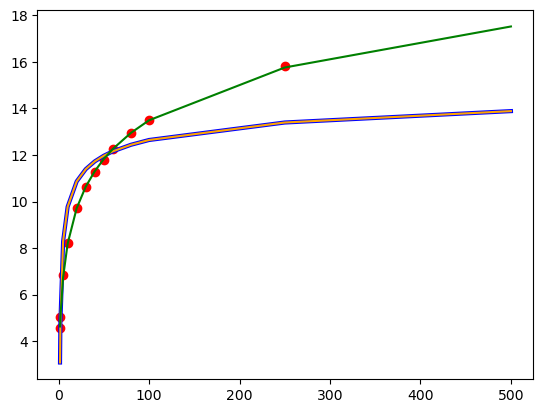

419 374 0.5
aris [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris2 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris3 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]

gevs [10.28817  11.350714 15.100003 17.988804 21.057371 22.948126 24.332928
 25.431196 26.343689 27.809952 28.968311 33.88719  29.804762]
gevs2 [10.28817  11.350714 15.100003 17.988804 21.057371 22.948126 24.332928
 25.431196 26.343689 27.809952 28.968311 33.88719  37.43341 ]
gevs3 [10.28816986 11.35071373 15.10000324 17.98880386 21.05737114 22.94812584
 24.3329277  25.43119621 26.34368896 27.80995178 28.96831131 33.88719177
 37.43341247]

result [10.46802022 11.28380507 14.87958534 17.89107562 21.0781689  23.00950636
 24.40631702 25.50387257 26.40934203 27.85325385 28.98548701 33.73802144
 37.43341247]
result2 [10.46802022 11.28380507 14.87958534 17.89107562 21.0781689  23.00950636
 2

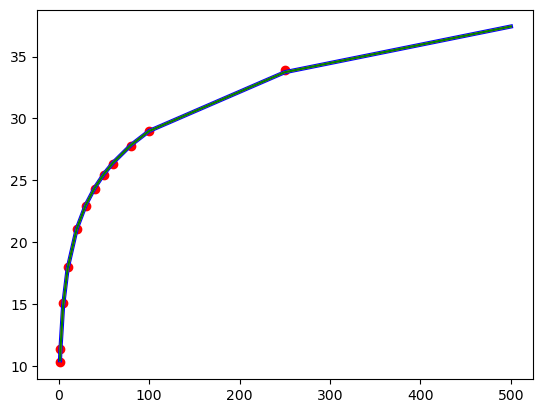

323 515 1.0
aris [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris2 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris3 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]

gevs [14.01797  15.372786 20.103851 23.708366 27.508362 29.83802  31.539532
 32.886463 34.004036 35.797234 37.21186  43.204006 38.295944]
gevs2 [14.01797  15.372786 20.103851 23.708366 27.508362 29.83802  31.539532
 32.886463 34.004036 35.797234 37.21186  43.204006 38.295944]
gevs3 [14.01797009 15.37278557 20.10385132 23.70836639 27.50836182 29.83802032
 31.53953171 32.88646317 34.00403595 35.79723358 37.21186066 43.2040062
 38.29594291]

result [10.2830315  14.74576749 23.79062138 27.63597528 30.46139562 31.82428531
 32.69604109 33.32661692 33.81568583 34.54474238 35.07800352 37.02626143
 38.29594291]
result2 [10.2830315  14.74576749 23.79062138 27.63597528 30.46139562 31.82428531
 32

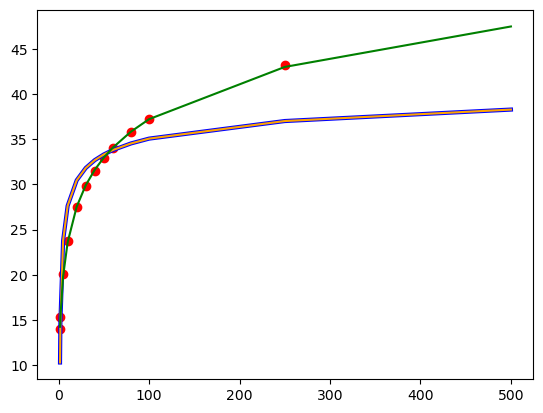

388 442 48.0
aris [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris2 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris3 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]

gevs [ 75.245056  83.18585  111.16353  132.63155  155.31113  169.20827
 179.3444   187.35593  193.99289  204.61888  212.97792  248.08508
 219.33687 ]
gevs2 [ 75.245056  83.18585  111.16353  132.63155  155.31113  169.20827
 179.3444   187.35593  193.99289  204.61888  212.97792  248.08508
 219.33238 ]
gevs3 [ 75.24505615  83.18585205 111.16352844 132.63154602 155.31112671
 169.20826721 179.34440613 187.35592651 193.9928894  204.61888123
 212.97792053 248.08508301 219.33238172]

result [ 52.99393532  79.49206075 133.19860814 156.03214453 172.80958552
 180.90253804 186.07911959 189.8235594  192.72771953 197.05697059
 200.22356612 211.79271085 219.33238172]
result2 [ 52.99393532  79.492060

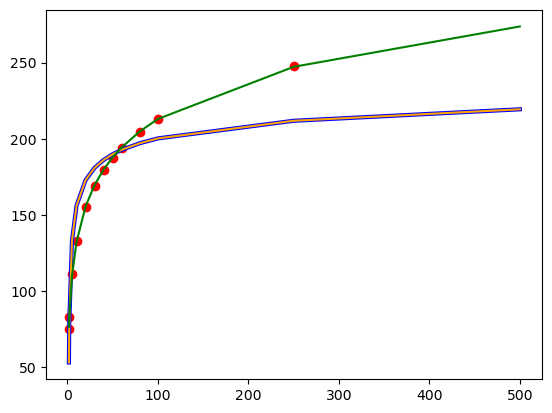

570 223 48.0
aris [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris2 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]
aris3 [  1.58   2.     5.    10.    20.    30.    40.    50.    60.    80.
 100.   250.   500.  ]

gevs [ 42.771397  46.675934  60.29499   70.69169   81.70483   88.494514
  93.475624  97.433556 100.72827  106.03676  110.24506  128.30244
 113.31128 ]
gevs2 [ 42.771397  46.675934  60.29499   70.69169   81.70483   88.494514
  93.475624  97.433556 100.72827  106.03676  110.24506  128.30244
 113.31128 ]
gevs3 [ 42.77139664  46.67593384  60.29499054  70.69168854  81.70482635
  88.49451447  93.47562408  97.4335556  100.72827148 106.03675842
 110.24506378 128.30244446 113.31128086]

result [ 31.74841848  44.74129569  71.07566626  82.27195684  90.49872828
  94.46710065  97.00543835  98.84152769 100.26558665 102.38844337
 103.94119152 109.61416426 113.31128086]
result2 [ 31.74841848  44.7412

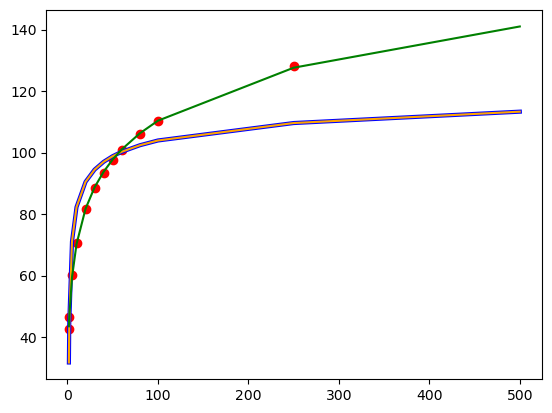

In [59]:
# Test fit curve at the points picked up

jdata_modified = jdata.copy()
mdata_modified = mdata.copy()


# lats = out_data.coords['lat'].values
# lons = out_data.coords['lon'].values
lats = jdata.coords['latitude'].values
lons = jdata.coords['longitude'].values
for point in point_list:
# for point in [((412, 427), 0.166667)]:
    coords, hr = point
    lat, lon = coords
    print(lat, lon, hr)
    latitude = lats[lat]
    longitude = lons[lon]
   
    # fit Johnny's data
    gevs= jdata.sel(latitude=latitude, longitude=longitude, Hrs=hr).values
    aris= jdata['ARI'].values
    aris_new = np.asarray([1.58, 2., 5., 10., 20., 30., 40., 50., 60., 80., 100., 250., 500.])
    result = extrp_gev_aris(aris[:-1], gevs[:-1], aris_new)
    # print('cov1', cov)
   
    # fit Meng's data
    gevs2= mdata.sel(lat=latitude, lon=longitude, hrs=hr).values
    aris2= mdata['ari'].values
    aris_new2 = np.asarray([1.58, 2., 5., 10., 20., 30., 40., 50., 60., 80., 100., 250., 500.])
    result2= extrp_gev_aris(aris2[:-1], gevs2[:-1], aris_new2)
    # print('ARIS', ARIs_data.sel(lat=latitude, lon=longitude, hrs=hr).values)
    # print('ARI500', ARI500_data.sel(lat=latitude, lon=longitude, hrs=hr).values)
    # print('cov2', cov2)
    
    # fit out_data with more floating 
    gevs3= out_data.sel(lat=latitude, lon=longitude, hrs=hr).values
    aris3= out_data['ari'].values
    aris_new3 = np.asarray([1.58, 2., 5., 10., 20., 30., 40., 50., 60., 80., 100., 250., 500.])
    result3 = extrp_gev_aris(aris3[:-1], gevs3[:-1], aris_new3)
    
    
    print('aris', aris)
    print('aris2', aris2)
    print('aris3', aris3)
    print()
    print('gevs', gevs)
    print('gevs2', gevs2)
    print('gevs3', gevs3)
    print()
    print('result', result)
    print('result2', result2)
    print('result3', result3)
    # print('out_data', out_data.sel(lat=latitude, lon=longitude, hrs=hr).values)
    
    
    hr_ind = np.where(jdata_modified['Hrs'] == hr)[0][0]
    print('hr_ind:', hr, hr_ind)
    print('old value: ', jdata_modified[12, hr_ind, lat, lon].values, mdata_modified[12, hr_ind, lat, lon].values)
    jdata_modified[12, hr_ind, lat, lon] = result3[-1]
    mdata_modified[12, hr_ind, lat, lon] = result3[-1]
    print('new value: ', jdata_modified[12, hr_ind, lat, lon].values, mdata_modified[12, hr_ind, lat, lon].values)
    print('--------------')
    
    plt.scatter(aris[:-1], gevs[:-1], label='NIWA', color='red', marker='o')
    plt.plot(aris_new, result, color='blue', linewidth='3', label='J-fitted')
    plt.plot(aris_new2, result2, color='orange', label='M-fitted')
    plt.plot(aris_new3, result3, color='green', label='out-fitted')
    plt.show()

In [55]:
jdata_modified = jdata.copy()
mdata_modified = mdata.copy()


# replace the value of ARI500 at the picked up points for the picked up duration with the result fitted by out_data
for point in point_list:
    coords, hr = point
    lat_ind, lon_ind = coords
    hr_ind = np.where(jdata_modified['Hrs'] == hr)[0][0]
    print('old value: ', jdata_modified[12, hr_ind, lat_ind, lon_ind].values, mdata_modified[12, hr_ind, lat_ind, lon_ind].values)
    jdata_modified[12, hr_ind, lat_ind, lon_ind] = result3[-1]
    mdata_modified[12, hr_ind, lat_ind, lon_ind] = result3[-1]
    print('new value: ', jdata_modified[12, hr_ind, lat_ind, lon_ind].values, mdata_modified[12, hr_ind, lat_ind, lon_ind].values)
    print('--------------')

old value:  13.886931 13.886931
new value:  141.01622 141.01622
--------------
old value:  29.804762 37.43341
new value:  141.01622 141.01622
--------------
old value:  38.295944 38.295944
new value:  141.01622 141.01622
--------------
old value:  219.33687 219.33238
new value:  141.01622 141.01622
--------------
old value:  113.31128 113.31128
new value:  141.01622 141.01622
--------------


In [20]:
mdata_modified

<xarray.DataArray 'Extreme_Precipitation' (ari: 13, hrs: 12, lat: 700, lon: 750)>
[81900000 values with dtype=float32]
Coordinates:
  * ari      (ari) float64 1.58 2.0 5.0 10.0 20.0 ... 80.0 100.0 250.0 500.0
  * hrs      (hrs) float64 0.1667 0.3333 0.5 1.0 2.0 ... 48.0 72.0 96.0 120.0
  * lat      (lat) float64 -34.02 -34.04 -34.06 -34.08 ... -47.96 -47.98 -48.0
  * lon      (lon) float64 165.0 165.0 165.0 165.1 ... 179.9 179.9 180.0 180.0
Attributes:
    units:       mm
    regenerate:  http://www.climsystems.com J.Yu 2021-06-07
    centers:     [ 25.124102  60.15388  118.06173  190.70569  308.85748 ]
    generate:    Meng Wang 2023-06-16
    source:      Add ARI500 extreme rainfall to NIWA HIRDS rainfall. Full cov...

array([ 42.77139664,  46.67593384,  60.29499054,  70.69168854,
        81.70482635,  88.49451447,  93.47562408,  97.4335556 ,
       100.72827148, 106.03675842, 110.24506378, 128.30244446,
       113.31128086])